# Machine Learning - Third Home Assignment - 2023/2024 
Group 11:

1. Afonso Germano (56849) – 27 horas                                               
2. Camila Canhoto (56859) – 27 horas
3. Duarte Gonçalves (56095) – 27 horas
4. Miguel Anjos (56863) – 27 horas

# 1. Libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, VotingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# 2. Functions

In [2]:
# Calculates and prints various statistics associated with the regression modeles
def printRegressionStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))
    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))

# 3. Dataset

## 3.1. Import and visualization

In [3]:
# Load dataset using pickle
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

# Visualization
X_train_df = pd.DataFrame(X_train, columns=col_names)
X_train_df

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.2. Split

In [4]:
# Split the dataset into training and testing sets, with 75% of the data used for training and 25% for testing
X_train1, X_test, y_train1, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

## 3.3. Scaling

In [5]:
# Standardize the features using Standard Scaler
scaler = StandardScaler()

# Apply the scaler to the training set, input variables, and test set
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test)
X_ivs_scaled = scaler.transform(X_ivs)

## 3.4. Feature Selection

In [6]:
#Feature selection using RandomForestRegressor, keeping features with importance above the median threshold
N,M=X_train.shape

rfr=RandomForestRegressor(random_state=0)
sel = SelectFromModel(estimator=rfr, threshold = "median") # tested thresholds ["mean","median"]
sel.fit(X_train_scaled, y_train1)

print("Importances: ", sel.estimator_.feature_importances_)
print("Default threshold: ", sel.threshold_)

features=sel.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)
print("The number of selected features is:", len(Features_selected))

# Apply the feature selector to transform scaled training, testing, and ivs
nX_train=sel.transform(X_train_scaled)
nX_test=sel.transform(X_test_scaled)
nX_ivs=sel.transform(X_ivs_scaled)

Importances:  [3.58758097e-03 3.98120075e-03 2.59591752e-03 ... 1.01267161e-04
 3.83181038e-04 9.80920960e-05]
Default threshold:  0.00013701914947490782
The features selected are columns:  [   0    1    2 ... 2124 2125 2130]
The number of selected features is: 1066


# 4. Regression Models

For each of the regression models considered, two distinct approaches to determine the optimal hyperparameters were made: by using GridSearchCV or by using manual loops (for cycles). In most cases, the results obtained considering these two approaches were similar, and, as such, some models display GridSearchCV and others display for cycles.

## 4.1. Decision Tree

The Decision Tree model recursively partitions the dataset based on the features to make predictions. The hyperparameters tested were:
1. Maximum depth.
2. Minimum number of samples per leaf.
3. Criteria.

Regression Statistics for Decision Tree:
The RVE is:  0.4309125425738377
The rmse is:  0.21183400776570827
The Correlation Score is: 0.6631 (p-value=8.022041e-233)
The Maximum Error is:  0.8685439494285714
The Mean Absolute Error is:  0.1620041040342072
Best Parameters: {'criterion': 'squared_error', 'max_depth': 18, 'min_samples_leaf': 15}


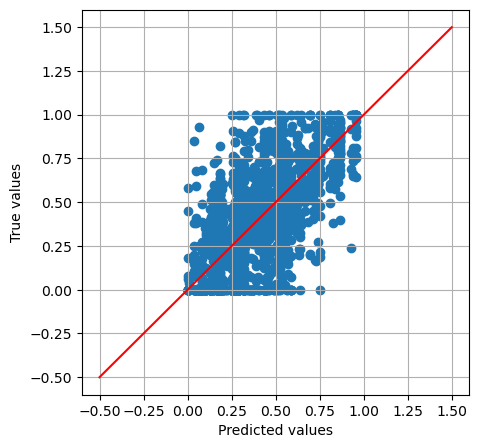

In [9]:
MaxDepths = [15,18,20]  
MinSamplesLeaves = [15,20] 
Criteria = ["absolute_error", "friedman_mse", "squared_error", "poisson"] 

param_gridDTC = {"max_depth": MaxDepths, "min_samples_leaf": MinSamplesLeaves, "criterion": Criteria}

dt = DecisionTreeRegressor()

dt_gs = GridSearchCV(estimator=dt, param_grid=param_gridDTC, scoring="neg_mean_squared_error")
dt_gs.fit(nX_train, y_train1)
dt_preds = dt_gs.best_estimator_.predict(nX_test)

print("Regression Statistics for Decision Tree:")
printRegressionStatistics(y_test, dt_preds)
print("Best Parameters:", dt_gs.best_params_)

plt.figure(figsize=(5,5))
plt.scatter(dt_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show()

## 4.2. Linear Regression

Linear Regression models the relationship between the dependent variable (y) and independent variables (features). This model does not have hyperparameters.

Regression Statistics for Linear Regression:
The RVE is:  0.5471550997547718
The rmse is:  0.1890277168339715
The Correlation Score is: 0.7461 (p-value=0.000000e+00)
The Maximum Error is:  0.7659100022092242
The Mean Absolute Error is:  0.14685994623727855


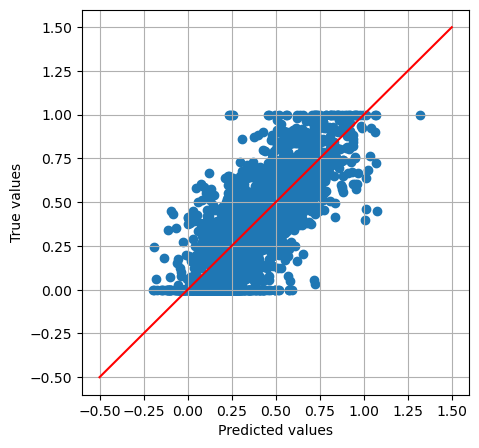

In [10]:
linear_reg = LinearRegression().fit(nX_train, y_train1)

LR_preds=linear_reg.predict(nX_test)

print("Regression Statistics for Linear Regression:")
printRegressionStatistics(y_test, LR_preds)

plt.figure(figsize=(5,5))
plt.scatter(LR_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show()   

## 4.3. Random Forest

Random Forest is an ensemble method that constructs multiple decision trees and combines their predictions. The tested hyperparameters were:
1. Number of estimators.
2. Maximum depth.
3. Minimum samples per leaf.

Regression Statistics for Random Forest:
The RVE is:  0.6457185315972882
The rmse is:  0.16739777599998337
The Correlation Score is: 0.8061 (p-value=0.000000e+00)
The Maximum Error is:  0.82889454559
The Mean Absolute Error is:  0.1289190833175788
Best Parameters: {'n_estimators': 450}


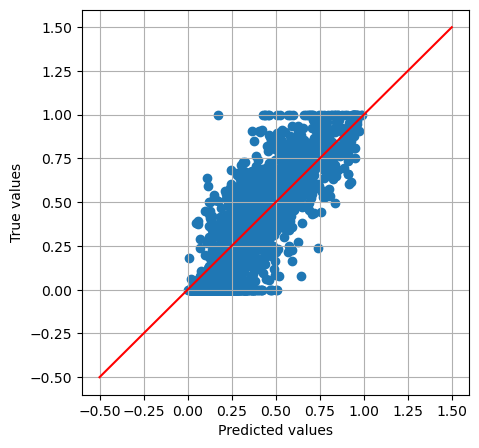

In [11]:
param_grid = {
    'n_estimators': [450]             
    #'max_depth': [5, 10, 20],        
    #'min_samples_leaf': [5,10,20]    
}

rfr = RandomForestRegressor()

RF_gs = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)
RF_gs.fit(nX_train, y_train1)
RF_preds = RF_gs.best_estimator_.predict(nX_test)

print("Regression Statistics for Random Forest:")
printRegressionStatistics(y_test, RF_preds)
print("Best Parameters:", RF_gs.best_params_)

plt.figure(figsize=(5,5))
plt.scatter(RF_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show() 

## 4.4. Ridge

Ridge Regression is a linear regression technique that introduces regularization to prevent overfitting. The tested hyperparameters were different alpha values.

Regression Statistics for Ridge:
The RVE is:  0.5622864170289181
The rmse is:  0.18578581260914404
The Correlation Score is: 0.7528 (p-value=0.000000e+00)
The Maximum Error is:  0.8050452882677726
The Mean Absolute Error is:  0.144528613365543
Best Parameters: {'alpha': 100.0}


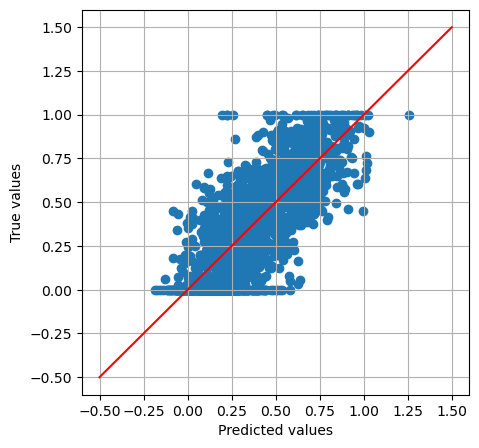

In [12]:
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_gridRidge = {"alpha": alpha_values}

ridge = Ridge()

ridge_gs = GridSearchCV(estimator=ridge, param_grid=param_gridRidge, scoring="neg_mean_squared_error", cv=5)
ridge_gs.fit(nX_train, y_train1)

ridge_preds = ridge_gs.best_estimator_.predict(nX_test)

print("Regression Statistics for Ridge:")
printRegressionStatistics(y_test, ridge_preds)
print("Best Parameters:", ridge_gs.best_params_)

plt.figure(figsize=(5,5))
plt.scatter(ridge_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show() 

## 4.5. Lasso

Lasso Regression, similarly to Ridge, is a linear regression method with added regularization.  The tested hyperparameters were different alpha values.

Regression Statistics for Lasso:
The RVE is:  0.5774869967014196
The rmse is:  0.18247194824444335
The Correlation Score is: 0.7599 (p-value=0.000000e+00)
The Maximum Error is:  0.8233362106770662
The Mean Absolute Error is:  0.14225090429387308
Best Parameters: {'alpha': 0.001}


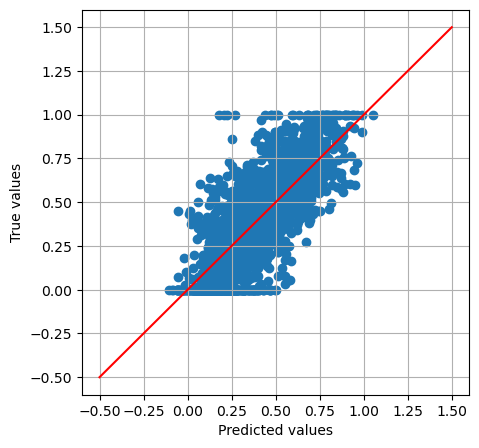

In [13]:
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_gridLasso = {"alpha": alpha_values}

lasso = Lasso()
lasso_gs = GridSearchCV(estimator=lasso, param_grid=param_gridLasso, scoring="neg_mean_squared_error", cv=5)
lasso_gs.fit(nX_train, y_train1)

lasso_preds = lasso_gs.best_estimator_.predict(nX_test)

print("Regression Statistics for Lasso:")
printRegressionStatistics(y_test, lasso_preds)
print("Best Parameters:", lasso_gs.best_params_)

plt.figure(figsize=(5,5))
plt.scatter(lasso_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show() 

## 4.6. K-Nearest Neighbours (KNN) Regressor

KNN makes predictions based on the average of the k-nearest neighbours in the feature space. The tested hyperparameters tested were:
1. Number of neighbours.
2. Weight of the neighbours.

Regression Statistics for KNN:
The RVE is:  0.6181718787162138
The rmse is:  0.17350192985570337
The Correlation Score is: 0.7883 (p-value=0.000000e+00)
The Maximum Error is:  0.7496349556277591
The Mean Absolute Error is:  0.12985345318139074
Best Parameters: {'n_neighbors': 6, 'weights': 'distance'}


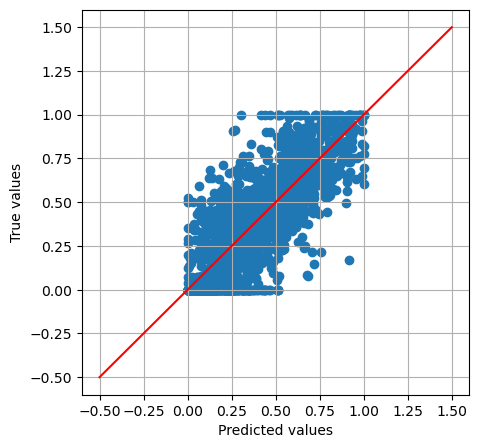

In [14]:
neighbors = [4, 5, 6, 10]
weights = ['uniform', 'distance']

param_gridKNN = {"n_neighbors": neighbors,
                "weights" : weights}

KNN = KNeighborsRegressor()
KNN_gs = GridSearchCV(estimator=KNN, param_grid=param_gridKNN, scoring="neg_mean_squared_error", cv=5)
KNN_gs.fit(nX_train, y_train1)
KNN_preds = KNN_gs.best_estimator_.predict(nX_test)

print("Regression Statistics for KNN:")
printRegressionStatistics(y_test, KNN_preds)
print("Best Parameters:", KNN_gs.best_params_)

plt.figure(figsize=(5,5))
plt.scatter(KNN_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show()

## 4.7. Support Vector Regressor (SVR)

SVR utilizes support vector machines to find the hyperplane that best fits the data while minimizing errors. The tested hyperparameters were:
1. Gamma.
2. Cs.

Regression Statistics for SVR:
The RVE is:  0.6354096390246815
The rmse is:  0.1696624809992578
The Correlation Score is: 0.8022 (p-value=0.000000e+00)
The Maximum Error is:  0.876148762275362
The Mean Absolute Error is:  0.13356106902733966
Best Parameters: {'C': 1, 'gamma': 0.001}


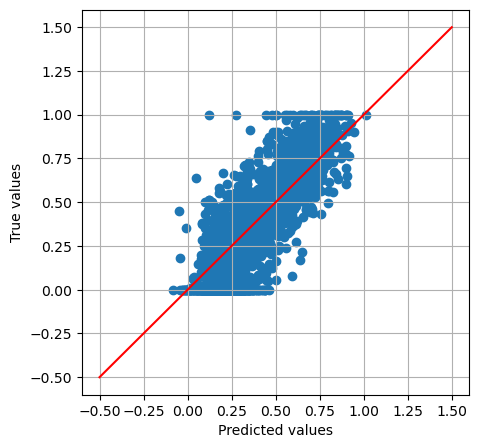

In [15]:
gammas = [1e-1, 1e-2, 1e-3]
Cs = [1, 10, 100]

param_gridSVR = {"gamma": gammas,
                "C" : Cs}

svr = SVR()

svr_gs = GridSearchCV(estimator=svr, param_grid=param_gridSVR, scoring="neg_mean_squared_error", cv=5)
svr_gs.fit(nX_train, y_train1)
svr_preds = svr_gs.best_estimator_.predict(nX_test)

print("Regression Statistics for SVR:")
printRegressionStatistics(y_test, svr_preds)
print("Best Parameters:", svr_gs.best_params_)

plt.figure(figsize=(5,5))
plt.scatter(svr_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show()

# 5. Boosting

Boosting is an ensemble learning technique that combines multiple weak learners to create a strong predictive model. 

## 5.1. Gradient Boosting

Gradient Boosting builds a series of weak learners sequentially, each correcting the errors of the previous models. The following hyperparameters were considered:
1. Maximum depth.
2. Minimum samples per leaf.
3. Criteria.
4. Number of estimators.

Regression Statistics for Gradient Boosting:
The RVE is:  0.6667290763682144
The rmse is:  0.16209242101484145
The Correlation Score is: 0.8165 (p-value=0.000000e+00)
The Maximum Error is:  0.8550640013062002
The Mean Absolute Error is:  0.12177782243791051


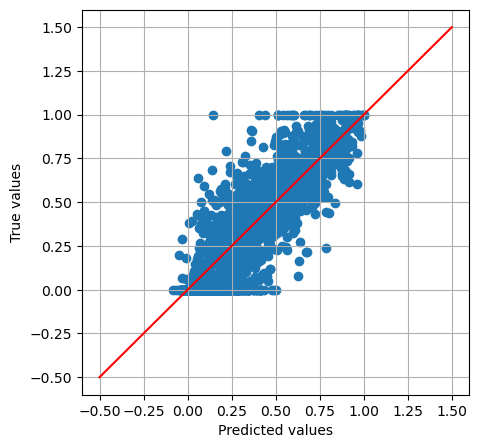

In [16]:
# Create and fit the Gradient Boosting model with the optimal hyperparameters
gb_reg = GradientBoostingRegressor(max_depth=18, min_samples_leaf = 15, criterion = "squared_error", n_estimators=150, random_state=0)
gb_reg.fit(nX_train, y_train1)

gb_preds = gb_reg.predict(nX_test)

print("Regression Statistics for Gradient Boosting:")
printRegressionStatistics(y_test, gb_preds)

# Plot model
plt.figure(figsize=(5,5))
plt.scatter(gb_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show()

## 5.2. Extreme Gradient Boosting (XGBoost)

XGBoost is a more efficient and faster technique than Gradient Boosting. The following hyperparameters were considered:
1. Maximum depth.
2. Number of estimators.
3. Learning rate.

Regression Statistics for XGBoost:
The RVE is:  0.6560210487555429
The rmse is:  0.16478664890707503
The Correlation Score is: 0.8100 (p-value=0.000000e+00)
The Maximum Error is:  0.8907194435596466
The Mean Absolute Error is:  0.12296986231676403


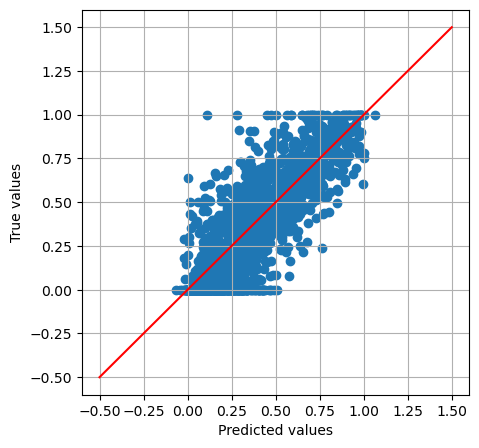

In [26]:
# Create and fit the XGBoost model with the optimal hyperparameters
xgb_reg = XGBRegressor(max_depth=12, n_estimators=100,learning_rate = 0.15, random_state=0)
xgb_reg.fit(nX_train, y_train1)

xgb_preds = xgb_reg.predict(nX_test)

print("Regression Statistics for XGBoost:")
printRegressionStatistics(y_test, xgb_preds)

plt.figure(figsize=(5,5))
plt.scatter(xgb_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show()

## 5.3. Adaboost

Adaboost focuses on the weaknesses of individual models and assigns different weights to each model's predictions, while adapting to the errors made by the previous. The tested hyperparameters were:

1. Number of estimators.
2. Learning Rate.

Regression Statistics for Adaboost:
The RVE is:  0.6082193696883331
The rmse is:  0.17584228045399947
The Correlation Score is: 0.7911 (p-value=0.000000e+00)
The Maximum Error is:  0.7934323168048298
The Mean Absolute Error is:  0.14201935121270975


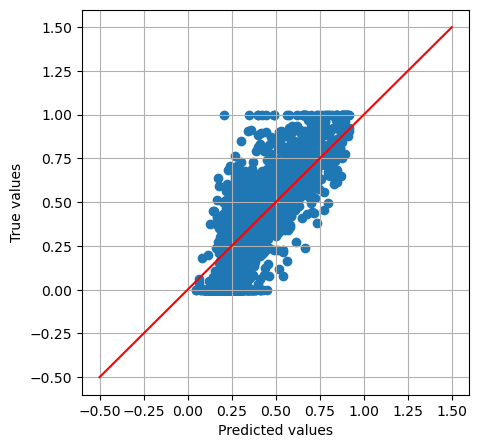

In [29]:
# Base model
decision_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=18, min_samples_leaf=15)

adaboostDT_reg = AdaBoostRegressor(decision_tree,n_estimators=150, learning_rate = 0.1, random_state=0)  
adaboostDT_reg.fit(nX_train, y_train1)
adaboostDT_preds = adaboostDT_reg.predict(nX_test)

print("Regression Statistics for Adaboost:")
printRegressionStatistics(y_test, adaboostDT_preds)

plt.figure(figsize=(5,5))
plt.scatter(adaboostDT_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show()

# 6. Bootstrap Aggregating (Bagging)

Bagging is an ensemble technique that builds multiple models independently and combines their predictions.

## 6.1. Bagging with Decision tree
The tested hyperparameters were:
1. Number of estimators.

Regression Statistics for Bagging with Decision Tree:
The RVE is:  0.541572134937921
The rmse is:  0.19022203513125838
The Correlation Score is: 0.7463 (p-value=0.000000e+00)
The Maximum Error is:  0.7481769901901831
The Mean Absolute Error is:  0.15067956322872533


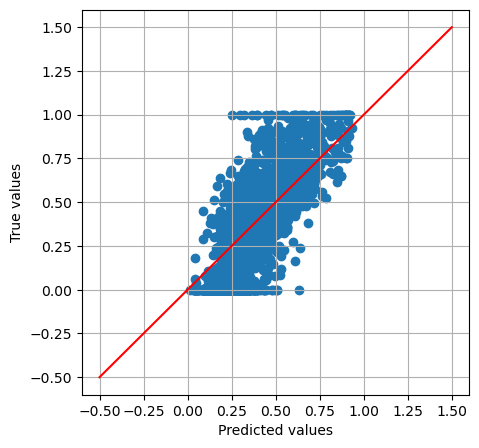

In [19]:
# Best performing SVR model that will be used as base_model
decision_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=18, min_samples_leaf=15)

baggingSVR_model = BaggingRegressor(decision_tree, n_estimators=250, random_state=0)
baggingSVR_model.fit(nX_train, y_train1)
baggingSVR_preds = baggingSVR_model.predict(nX_test)

print("Regression Statistics for Bagging with Decision Tree:")
printRegressionStatistics(y_test, baggingSVR_preds)

plt.figure(figsize=(5,5))
plt.scatter(baggingSVR_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show()

## 6.2. Bagging with KNN
The tested hyperparameters were:
1. Number of estimators.

Regression Statistics for Bagging with KNN:
The RVE is:  0.6353944324595873
The rmse is:  0.16949219202801624
The Correlation Score is: 0.7974 (p-value=0.000000e+00)
The Maximum Error is:  0.7221042949722384
The Mean Absolute Error is:  0.12791617918785386


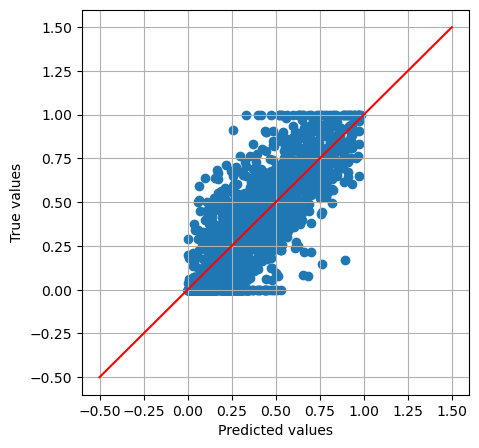

In [13]:
# Best performing KNN model that will be used as base_model
base_model = KNeighborsRegressor(n_neighbors = 4, weights = "distance")

bagging_modelKNN = BaggingRegressor(base_model, n_estimators=150, random_state=0)
bagging_modelKNN.fit(nX_train, y_train1)
baggingKNN_preds = bagging_modelKNN.predict(nX_test)

print("Regression Statistics for Bagging with KNN:")
printRegressionStatistics(y_test, baggingKNN_preds)

plt.figure(figsize=(5,5))
plt.scatter(baggingKNN_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5,1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show()

# 7. Ensemble models using Voting Regressor

Cross-Validation Scores:
[-0.02574688 -0.02696443 -0.03078021 -0.02736433 -0.02659417]
Mean CV Score: -0.027490003934680384

Test Set Evaluation:
Ensemble Model Statistics:
The RVE is:  0.6803070426623172
The rmse is:  0.15883824458539902
The Correlation Score is: 0.8269 (p-value=0.000000e+00)
The Maximum Error is:  0.8750329882217408
The Mean Absolute Error is:  0.1216576124019944
Mean Squared Error: 0.02522958794297104


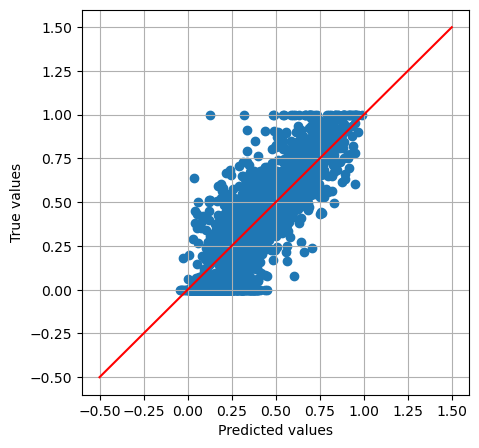

In [7]:
# Base models (best performing models) 
gb = GradientBoostingRegressor(max_depth=18, min_samples_leaf = 15, criterion = "squared_error", n_estimators=150, random_state=0)
xgboost = XGBRegressor(max_depth=12, n_estimators=150, learning_rate = 0.15, random_state=0)
svr = SVR(C=1,gamma=0.001)

# Ensemble model
ensemble_model = VotingRegressor(
    estimators=[
        ('gb', gb),
        ('xg', xgboost),
        ('svr', svr),
    ]
)

# Cross validation
cv_scores = cross_val_score(ensemble_model, nX_train, y_train1, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

ensemble_model.fit(nX_train, y_train1)

ensemble_preds = ensemble_model.predict(nX_test)

print("Ensemble Model Statistics:")
printRegressionStatistics(y_test, ensemble_preds)
print("Mean Squared Error:", mean_squared_error(y_test, ensemble_preds))

plt.figure(figsize=(5, 5))
plt.scatter(ensemble_preds, y_test)
plt.plot([-0.5, 1.5], [-0.5, 1.5], c="r")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.grid()
plt.show()

In [15]:
# Difference between training and testing MSE
ensemble_model.fit(nX_train, y_train1)

y_train_pred = ensemble_model.predict(nX_train)
y_test_pred = ensemble_model.predict(nX_test)

mse_train = mean_squared_error(y_train1, y_train_pred)
print(f"MSE on training data: {mse_train}")

mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE on test data: {mse_test}")

MSE on training data: 0.0024393458650751134
MSE on test data: 0.02522958794297104


# 8. Final Predictions

This section involves the application of the best-performing model to make final predictions on new data (X_ivs).

In [17]:
ivs_preds = ensemble_model.predict(nX_ivs)
output_file = "AA_HA3_Group11_preds.txt"
with open(output_file, "w") as file:
    for pred in ivs_preds:
        file.write(f"{pred}\n")